---
# Peeking Inside Ulabox
### By: Greg Araya


---



## Report Summary


In this analytical report, I will be writing as if I was hired by the company Ulabox as a consultant to analyze their data and make recommendations to improve business. I hope to achieve this by asking and answering a few questions that I have come up with. These questions were crafted in order to provide insights on the customers that should produce clear suggestions for further actions (or research) that would benefit the company. So to begin, let's take a look at the data set and questions that we will be going through.

## Introduction to Ulabox and their Data Set

The following analysis has been conducted on a data set that comes directly from a company named Ulabox. They are the most successful grocery store/supermarket in Spain that is 100% online. They even proclaim in big script at the top of the About Ulabox section of their website: "The supermarket has died, welcome to the AntiSupermarket." The audacity of that statement alone caught my attention, but after perusing [their website](https://www.ulabox.com/en/) some more I also got an idea of what sort of products they offer, as well as some thoughts about their business.

Along with the website they also have an app that can be downloaded on any smart phone to use for ordering products and planning delivery times. However, I will note that all of their business is done within Spain at this time. Even so, they are getting more than €1 million in monthly revenue, which makes this data quite significant. Before we begin any analysis, let's take a look at the data to get accustomed to it. All customer information was anonymized into "Customer IDs", and I was not provided with any personal information beyond that. Below are the first 10 orders from customers in the data set.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats
%matplotlib inline

In [2]:
main_df = pd.read_csv('ulabox_orders_with_categories_partials_2017.csv')    # Read in the CSV file
main_df.head(10)                                                            # Display the first 10 rows

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
0,0,0,45,23.03,4,13,9.46,87.06,3.48,0.00,0.00,0.00,0.0,0.0
1,0,1,38,1.22,5,13,15.87,75.80,6.22,2.12,0.00,0.00,0.0,0.0
2,0,2,51,18.08,4,13,16.88,56.75,3.37,16.48,6.53,0.00,0.0,0.0
3,1,3,57,16.51,1,12,28.81,35.99,11.78,4.62,2.87,15.92,0.0,0.0
4,1,4,53,18.31,2,11,24.13,60.38,7.78,7.72,0.00,0.00,0.0,0.0
5,1,5,8,23.89,4,13,0.00,100.00,0.00,0.00,0.00,0.00,0.0,0.0
6,1,6,35,17.26,1,10,13.01,51.84,29.36,5.79,0.00,0.00,0.0,0.0
7,1,7,12,6.61,4,8,17.21,67.93,14.86,0.00,0.00,0.00,0.0,0.0
8,1,8,35,22.29,1,12,15.50,61.65,22.85,0.00,0.00,0.00,0.0,0.0
9,1,9,44,20.39,2,12,15.29,44.11,12.28,8.90,15.53,3.90,0.0,0.0


Each of the rows above is an order from a customer. The entire data set contains 30,000 rows, which means there are 30,000 orders to be examined. Ulabox stated that this data set is from "the beginning of 2017," but did not give an exact timeline of the events. The columns that I will mainly be focusing on in this report are the following:

* customer : Anonymized customer IDs.
* discount% : The percent of total discount received.
* weekday : Day of the week when the order was paid, where 1=Monday and 7=Sunday.
* hour : The hour of the day the purchase was made, in military time.
* Food% : Non perishable food, think of what you would put in your cupboard.
* Fresh% : Fresh and frozen food, for example: fresh tuna, fruits, salads, meat.
* Drinks% : All kind of beverages, such as water, juice, wine, alcoholic drinks, milk, or soy drinks.
* Home% : Products for the home, like toilet paper or small appliances.
* Beauty% : Items for cleaning your body and makeup.
* Health% : Medicinal products that can be sold without a prescription: diet pills, condoms, tooth paste.
* Baby% : Items such as diapers, baby food, baby care.
* Pets% : Any items related with dogs, cats and other pets.


Using the information in these columns I will answer the following questions:

### Questions to be investigated (and how):


1. When are orders most likely?

   I plan to explore this question by looking at the percentage of orders in three ways. I will start by looking at each day individually, followed by each hour individually but taken over all days. After that I will look at all hours of all days to solidify any lingering curiosities.


2. Who are the customers who order the most, and what do they like to purchase? What about the customers who order the least?

   This question will be answered by first calculating some descriptive statistics about the customers found within this data set. Using these statistics, I will then create definitions for what we will call "frequent" and "infrequent" customers. Then, I will make two new dataframes that only include customers that fall into each of these definitions. Finally, taking the average percentage of each order that comes from each product category, we will be able to visualize and analyze their habits.


3. When customers get a large discount, what do they buy?

   The final portion of this document will cover customers who have received large discounts on their orders. I will first create a definition for what I believe is a "large discount", then I will make a new dataframe that only includes orders from customers that meet this criteria. Following this, I will craft a visual that represents the percentage of orders that come from every product category and compare them.


---

### Q1. When are orders most likely?

The importance of investigating this question:

* This knowledge could help tailor deals to promote items customers may not have considered. For example, customers ordering drinks at a late hour of a weekend night might have had a few "adult beverages" already and would be easily convinced to add in some delicious treats they wouldn't have otherwise, or at least some Berroca.

* It could also help us to plan new offerings that keep customers coming back at otherwise slow hours.

* This information could also modify promotion windows to help empty inventory by strategically giving deals at certain times. Maybe there isn't much heavy activity for baby products on weekends, but the warehouses get new shipments on Monday morning, so it would be helpful to clear space.

Below, I have created two visuals for our data. The first is a pie chart which shows the percentage of orders that occur on each weekday. Below this is a histogram that shows the number of orders that were made on each hour over all days.

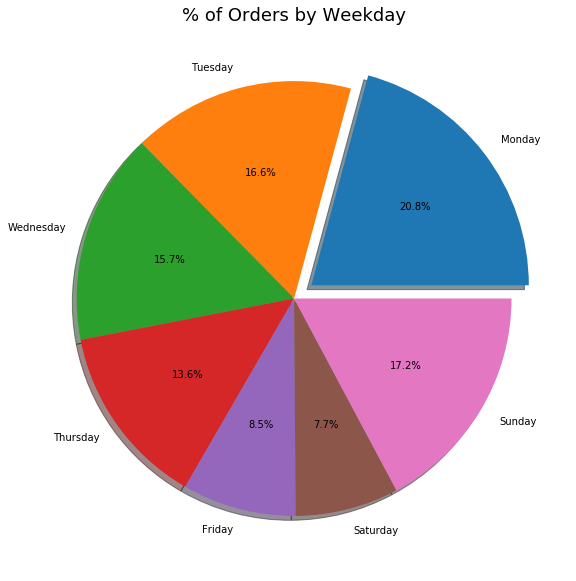

In [3]:
days = 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
exp = (0.1, 0, 0, 0, 0, 0, 0)                       # above: list of days // this line: choose the slice to pull out
plt.figure(figsize=(10,10))                         # set the size of the figure so it is more readable
plt.pie(
    main_df['weekday'].value_counts(sort=False),    # grab weekday counts and don't sort by values
    labels=days,                                    # label the days
    autopct='%1.1f%%',                              # set digits of percentages
    explode=exp,                                    # pull out the chosen slice
    shadow=True)                                    # set a shadow behind the slices

plt.title('% of Orders by Weekday', fontsize=18)    # create a title
plt.rcParams["axes.labelweight"] = "bold"           # bold the text for readability
plt.show()                                          # plot away

### Q1 Findings by Weekday:

Here we have the percentage of orders made on each day. Weirdly, it's almost as if the days are in a circular rhythm. Activity starts big on Sunday, peaks on Monday, then dwindles throughout the week until it gets back to Sunday. I imagine that this may be because many people like to do their shopping during the weekend in order to get all the supplies they need for the upcoming week. However, because Ulabox is not an immediate delivery service and brings your order to you within a window of time you choose the next day, people are probably not ordering on Fridays and Saturdays so that they don't have to sit at home waiting on a delivery when they could be enjoying their weekend. Hence, leaving it off until Sunday seems normal. Then on Monday comes all the procrastinators (people who are already more likely to be using a delivery service like this in the first place) who couldn't bring themselves to do it on Sunday.

### Q1 Action Items by Weekday:

One idea I have that could help Ulabox promote activity from those "working for the weekend" types is to consider providing a prepared foods service. That is, they could have a small team prepare very simple meals that are easy to do in mass quantities, such as a simplified version of Spain's famous dish paella, and shell that out as they make other regular deliveries. Friday and Saturday get less than half of the service as Monday, so clearly Ulabox has the workforce capability to do more deliveries than they are doing on these days. If they limited these sorts of meals to Friday and Saturday it could help them generate more income over these days without disrupting the flow of the rest of the week, which sees a good amount of activity already.

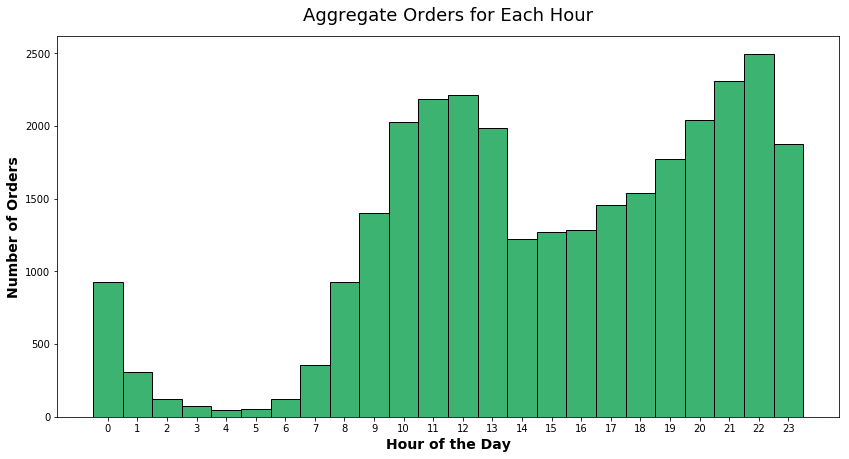

In [4]:
plt.figure(figsize=(14,7))                   # change size so it's not tiny
plt.hist(
        main_df['hour'],
        bins=np.arange(25)-0.5,
        edgecolor='black',
        color='mediumseagreen')              # plot hours, center x labels, give edges, set color

plt.xticks(range(24))                        # make sure all hours show up in full range
plt.ylabel('Number of Orders', fontsize=14)  # add labels on the x and y axis
plt.xlabel('Hour of the Day', fontsize=14)
plt.title('Aggregate Orders for Each Hour',  # add a title
              y=1.025, fontsize=18) 
plt.show()                                   # plot it

### Q1 Findings by the Hour:

Here we have a figure of the aggregate orders by hour of the day, over all days recorded. There are two spikes of activity that stick out to me. The first around lunch time, and the second around 11 pm (or the 23rd hour in military time). On further inspection of their website I found that they guarantee delivery of any order by the next day if you order before 11 pm, so this would explain that late night spike. Customers are likely rushing to make those last minute orders.

However, there isn't anything obvious from their website that explains the heavy activity around noon. They aren't an immediate delivery company like GrubHub or Uber Eats, so what gives? My thought is that since people are starting to get hungry for their lunch, their thoughts generally drift over to food. Thus, they are more likely to remember those groceries they forgot to buy and hop onto the website or app to ease their mind.

### Q1 Action Items by the Hour:

This visual also helps create some distinct market segments that could be looked into further. Segmenting the market is useful because it increases our understanding of the customer's needs. We could use this information to drill deeper into these separate sets and match products up with the people who want them to maximize productivity. It would also help to focus marketing expenditures. Following this visual, the way that I would segment the customers is as follows:
* __The night owls__ (12 am - 5 am): They couldn't sleep because they know they forgot something. Tossing and turning, they remember, and Ulabox provides.


* __The early birds__ (6 am - 9 am): They woke up early before work to get their sweat on, but while they prepare their healthy breakfast they realize they're out of an essential ingredient or two. For those who plan ahead, Ulabox has you covered.


* __The hungry crowd__ (10 am - 1 pm): They don't want to be at work, who does? What's for lunch? What's for dinner for that matter? Do they even have any groceries at home? The hunger consumes their capacity for logic. Ulabox to the rescue.


* __The siesta takers__ (2 pm - 4 pm): They know that they need to replenish the groceries that went into making their lunches for the week, but they also know it can wait until after this power nap. Ulabox will still be here.


* __The dinner makers__ (5 pm - 8 pm): They got a surprise visitor at dinner and the leftovers they were hoping for got eaten. They're going to need more ingredients for tomorrow's dinner, but no worries! Ulabox can help.


* __The last minute marketers__ (9 pm - 11 pm): They totally forgot they were supposed to order those items today. Today! It's OK though, they have until 11 with Ulabox. They can go to bed with confidence now.

As stated before, it is pretty clear by looking at the two figures above that most orders are made on Mondays and/or during the 22nd hour. However, these may not be true simultaneously, so we should do some more research. Let's see how this shakes out on a day by day basis.

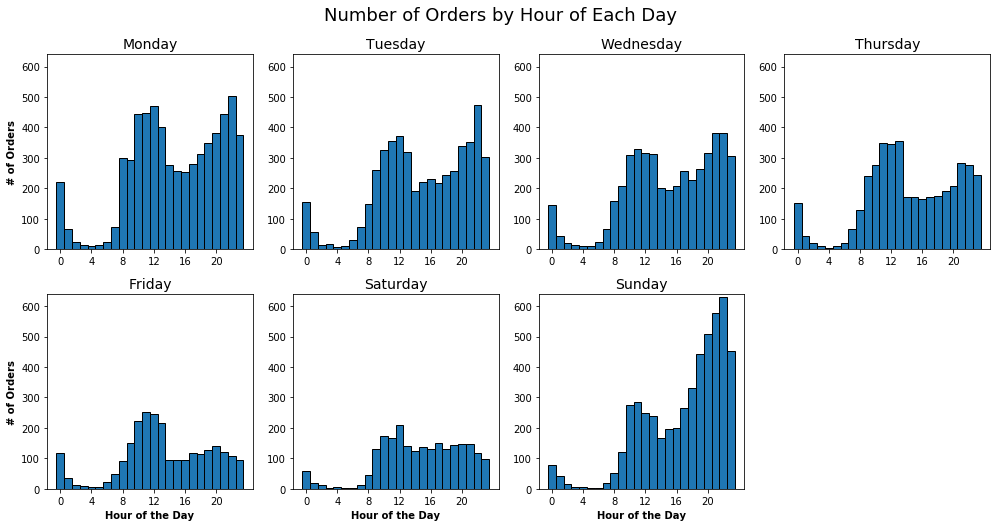

In [5]:
plt.figure(figsize=(14,7))                               # set the figure size, otherwise they're too small

for day in range(7):
    temp_df = main_df[main_df['weekday'] == day+1]       # make a temporary dataframe from the loop day
    plt.subplot(2, 4, day+1)                             # place the days in the correct order
    plt.hist(
        temp_df['hour'],
        bins=np.arange(25)-0.5,
        edgecolor='black')                               # make histogram, center x labels, add edges
    
    plt.title(days[day], fontsize=14)                                 # label each plot with the correct day
    plt.xticks(range(0, 24, 4))                          # edit the x labels so they're more frequent
    plt.ylim([0, 640])                                   # set limit of y axis so the data is easily comparable by sight
    
    if day == 0 or day == 4:                             # add a description on the outer most axes for clarity
        plt.ylabel('# of Orders')
    if day >= 4:
        plt.xlabel('Hour of the Day')
    
    temp_df = ()                                         # empty the temp dataframe to be safe

plt.suptitle('Number of Orders by Hour of Each Day',     # add a super title
                y=1.04, fontsize=18) 
plt.tight_layout()                                       # increase visibility
plt.show()                                               # plot away

### Q1 Findings by the Hour of Each Day:

Looking at the graphs for all seven days laid out by the hour it seems that the market segments that I invented generally hold true, with some minor deviations. There's a methodical burst of activity every day around noon. The only days that don't experience the last minute (before 11 pm) spikes are Friday and Saturday, which we pointed out in the day by day chart as being quite dull anyways. Activity is absolutely booming on Sunday before 11 pm, which is the highest hour of activity out of the whole week. This supports the idea that people have emptied their cabinets over the weekend and need to restock, but have also put it off until the last possible minute.

Another activity pattern that helps support my market segments above is the clear drop in activity right around 2 pm. This is most likely due to the brilliant Spanish custom of taking siestas. Notice how on weekdays (days that most people are working) there is a steep drop from 1 pm to 2 pm every day. However, on weekends this drop is slightly more subtle. You can also see that very few people are ordering between 1 am and 6 am on any day. This dip in activity undoubtedly comes from people sleeping however, and would not warrant a high priority in further analysis.

### Q1 Action Items by the Hour of Each Day:

It would be a smart move for Ulabox to push promotion notifications to app users around lunch time, and/or offer timed deals on the website to users who come online between 10 am and 1 pm. They're hungry and ready to spend money. Ulabox would also not want to take any bothersome actions during the 2 to 4 pm period (emails, popups, etc). 

---

### Q2. Who are the customers who order the most, and what do they like to purchase? What about the customers who order the least?

The importance of investigating this question for frequent buyers:


* This could show us what our most popular product types are with customers who are already hooked and keep coming back. This would be a good way to decide what coupons to produce for these types of customers to maintain their loyalty.


* If a customer doesn't come back for a while but used to be a frequent user, we could send over email coupons to get them back on the app or website or even ask why they stopped using the service to get some feedback.


* If customers keep coming back and buying something really specific, this could influence decisions regarding outreach advertising used to attract new customers.


The importance of investigating this question for infrequent consumers:


* The company could use this data to decide how to advertise outside of their own website or app that would successfully attract people who haven't used their services before.


* Following this, they could then look at where these one stop customers got these deals from to further influence future advertisement decisions. Are we advertising on the right sites, or on the right billboards?



Let's start by studying the number of orders that have been made by each customer. 

In [6]:
# Start by creating a list of the counts of each customer
ord_count = main_df['customer'].value_counts()

# Calculate the statistics of the list that we want
ord_stat = ord_count.describe(percentiles=[.25, .5, .9])

#Then we can print out our descriptive statistics in sentence form
print("There are {} total customers recorded in this data set. They average roughly {} orders each.".format(
            int(ord_stat['count']),ord_stat['mean'].round(2)))
print("The most orders we have recorded from any one customer is {}.".format(
            int(ord_stat['max'])))
print("Customers that are in the 90th percentile order {} times or more.".format(
            int(ord_stat['90%'])))

There are 10239 total customers recorded in this data set. They average roughly 2.93 orders each.
The most orders we have recorded from any one customer is 52.
Customers that are in the 90th percentile order 6 times or more.


By checking the statistics above we now know the total number of customers recorded in this data is 10,239. Although we have many customers, when you look at the average it tells us that most of them only order about 3 times or less. However, according to our max value, some customers have ordered up to 52 times as well. Seems like quite the spread. So then, let's define a frequent customer as one who is within the 90th percentile and orders 6 times or more. On the flip side, let's define an infrequent customer as one who orders 2 times or less.

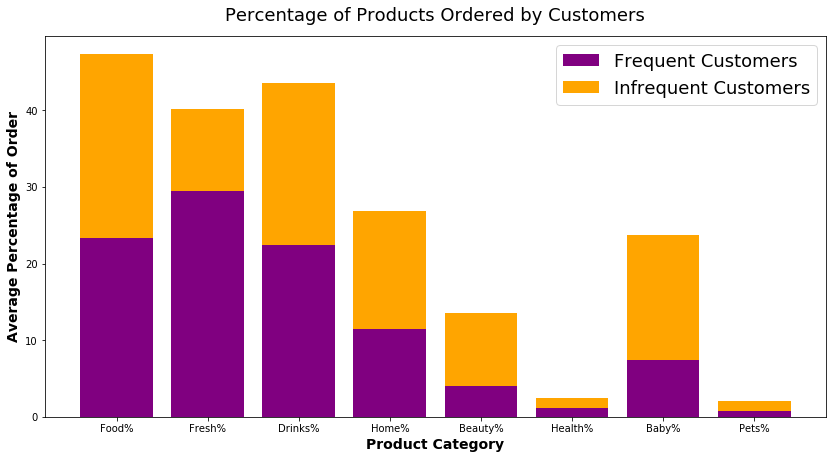

In [7]:
# Start by making a dateframe of only the customers with 6 or more orders
freq_cust = ord_count[ord_count.values >= 6]

# Then make a list of their customer IDs
freq_list = freq_cust.keys()

# Now we can make a new dataframe from the original data by only grabbing orders made by customers
# who appear on this list
freq_cust_df = main_df[main_df['customer'].isin(freq_list)]

# Following this, we can chart the average percentage of each order within the categories
freq_df2 = freq_cust_df[['Food%','Fresh%', 'Drinks%', 'Home%', 'Beauty%', 'Health%', 'Baby%', 'Pets%']]


# Then make a dateframe of only the customers with 2 or less orders
rare_cust = ord_count[ord_count.values <= 2]

# Then make a list of their customer IDs
rare_list = rare_cust.keys()

# Make a new dataframe from this data by only grabbing orders made by customers on this list
rare_cust_df = main_df[main_df['customer'].isin(rare_list)]

# Then we can chart the average percentage of each order within the categories
rare_df2 = rare_cust_df[['Food%','Fresh%', 'Drinks%', 'Home%', 'Beauty%', 'Health%', 'Baby%', 'Pets%']]


#Now we can create a stacked bar chart using both of these selective dataframes
plt.figure(figsize=(14,7))
plt.bar(freq_df2.mean().keys(), height=freq_df2.mean(), align='center', color='purple')
plt.bar(rare_df2.mean().keys(), height=rare_df2.mean(), bottom=freq_df2.mean(),
        align='center', color='orange')

plt.ylabel('Average Percentage of Order', fontsize=14)
plt.xlabel('Product Category', fontsize=14)
plt.title('Percentage of Products Ordered by Customers', y=1.025, fontsize=18)
plt.legend(('Frequent Customers', 'Infrequent Customers'), prop={'size': 18})
plt.show()

### Q2 Frequent Customer Findings:

Fresh food is clearly the most commonly bought item among high frequency customers. This category is followed closely by drinks and non-perishable foods. Typical of what you might expect from a grocery store.  Health and Pet products however are unfortunately lagging far behind the other product lines. I believe that it would be in Ulabox's interest to try and advertise their health and pet products more heavily on the website, or possibly through an email blast to these types of customers.

It makes me wonder if people really know about the depth of their catalog. Thinking of it in a personal way, when I go to a store (or website) that I visit regularly I already know what I'm going to get. Unless there's some sort of flashy sign directly in my way (sometimes quite literally), I'll go right for my specific products and get out of there ASAP.

### Q2 Frequent Customer Action Items:

One idea that comes to mind is that Ulabox could have coupons that play off of other product lines. For example, they could say something like "try a new health product and get x% off your next order of your favorite fresh food item". This would get people to check out the other product sections since we know they'll most likely be buying fresh food soon. If a campaign like this doesn't seem to help the numbers bump up, they might also want to check out the competition. Is Ulabox offering the most popular products, or are they possibly just not offering enough variety of these products?

### Q2 Infrequent Customer Findings:

The infrequent customers look to act quite similarly to the frequent customers, except for one major difference. The fresh food category has dropped down in the ranks by a dramatic amount. This might be a sign that the uncommon customer doesn't trust the food to truly be as fresh as is claimed. Non-perishable food and drinks take the reigns as the clear winners this time around. Baby products surprisingly got a big bump with infrequent customers as well. Health and Pet products are still lagging pretty far behind the other categories, which is the same negative issue that comes up with the frequent customers. 

### Q2 Infrequent Customer Action Items:

The domination of non-perishable foods and drinks indicates to me that advertising products in these categories could entice some new customers more effectively than advertising items from their other sectors. If they aren't as willing to jump on the fresh food like the frequent customers are, maybe they're somewhat wary of trying the other product lines as well.

Baby products' success with infrequent consumers may point to another market to consider looking further into. It may be that the distressed parents who need more diapers, but can't get to the store for one reason or another, are more willing to shell out for the convenience than other customer types.

Ulabox might want to do some market research on the health and pet categories specifically and find out why they're not doing so well. Maybe they aren't carrying as many of the brands that people like. It's also possible that when people look for this type of service they don't realize that these products would be carried.

---

### Q3. When customers get a large discount, what do they buy?

The importance of investigating this question:


* Are people installing the app just to take advantage of a deal? This could help promote brainstorming on how to keep them from immediately ditching our services. For example, if we give them another discount on this sort of item, they would be more likely to buy it, increasing sales/activity and possibly getting them at the right time that they would look for other products they're interested in.


* Are these items priced appropriately?


* Are we losing out against the competition in these areas, or are they just really good deals?


* This knowledge could also uncover any issues with discounts or product categories. As things go with software, there could be a bug or something we would be missing otherwise.


In this instance we will define a "high discount" as one being 40% or more.

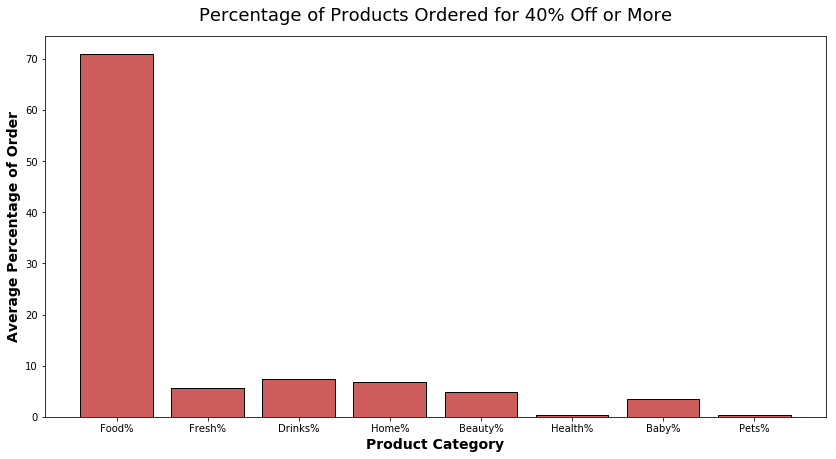

In [8]:
# Make a bar chart of all the order percentages of customers with 40%+ discount
big_disc = main_df[main_df['discount%'] >= 40]
big_disc = big_disc[['Food%','Fresh%', 'Drinks%', 'Home%', 'Beauty%', 'Health%', 'Baby%', 'Pets%']]
plt.figure(figsize=(14,7))
plt.bar(big_disc.mean().keys(),
        height=big_disc.mean(),
        align='center', 
        edgecolor='black',
        color='indianred')
plt.ylabel('Average Percentage of Order', fontsize=14)
plt.xlabel('Product Category', fontsize=14)
plt.title('Percentage of Products Ordered for 40% Off or More', y=1.025, fontsize=18)
plt.show()

### Q3 Findings:

Despite this graph being very one sided for non-perishable foods, this actually tells us a lot about what Ulabox is doing right, and what they could do to improve their services overall. Almost all of the customers who got a 40% discount or higher bought non-perishable foods. In fact when you look at the numbers, non-perishable foods account for over 70% of the orders from high discount orders. This means that if Ulabox wants to attract any customers back to their service, whether they have never used it before, used it once or twice, or use it multiple times a month, the non-perishable foods are extremely attractive. They were a high contender in both of my small studies of frequent and infrequent customers as well, so that informs us that there is something unique about this product category that is drawing people in and generally retaining them.

### Q3 Action Items:

I believe that if Ulabox wanted to boost sales in other areas beyond food and drinks, they should offer conditional coupons based on the non-perishable foods. This is similar to what I described above for the frequent customers, but more pointed. They could say "try this new pet product and we'll give you x% discount the next time you order your favorite non-perishable food item." This would steer some traffic of customers (new and old) to check out the other ranges of offerings and show them what we've got. Then they would feel compelled to make an order and they would want to come back another time to get more of what they were already getting. Even if this idea isn't adopted, the main point is that they should be able to leverage this product type to increase services as it is highly requested every way you look at the data.

### Bonus Question - a relevant extension of Question 3:
### Why are there multiple customers getting free orders, and who is customer 260?

While playing around with the data, I found that there were a number of people who got 100% discounts. This didn't seem right to me. As I looked into it, I also found that there were multiple customers who got more than one free order as well. Diving even deeper, there was one customer in particular that caught my eye, customer 260. Let's take a look below at what I found. First let's start by seeing how many times people have gotten free orders.

In [9]:
# Take a slice from the original main block of data where discounts are 100%
hi_disc_df = main_df[main_df['discount%'] >= 100]
size = hi_disc_df.shape
print("There are {} instances where the discount % is 100%.".format(size[0]))

There are 396 instances where the discount % is 100%.


Although 396 purchases out of 30,000 may not seem like much (about 1.32% to be exact), it is large enough that it troubles me. Why are so many people receiving a completely free order? Let's go deeper and see what these orders look like.

In [10]:
# Create some descriptive statistics for free customers in sentence form
free_stats = hi_disc_df['customer'].value_counts().describe()

#Then we can print out our descriptive statistics in sentence form
print("There are {} total customers recorded in this data set that get a 100% discount.".format(int(free_stats['count'])))
print("The most free orders recorded from any one customer is {} orders.".format(int(free_stats['max'])))

There are 321 total customers recorded in this data set that get a 100% discount.
The most free orders recorded from any one customer is 21 orders.


Seeing these statistics, I'm very interested in why there is one customer who has gotten 21 completely free orders in a year. If the number of customers getting a free delivery (321) was closer to the total number of free deliveries (396), I would have assumed that these were likely just some customer service responses to unfortunate scenarios, or something more reasonable. However, if someone is able to get 21 orders for free I think something else may be at play here. To cut out the customers that may have just been helped by customer service, I decided to only look at those who got three or more free orders.

In [11]:
# Start by creating a list from the counts of each customer using a 100% discount
free_cust = hi_disc_df['customer'].value_counts()

# Then cut down this list to only customers who have taken this discount three times or more
free_cust = free_cust[free_cust.values >= 3]
freeloaders = free_cust.keys()
print("The customers who have received three or more free orders are: ")
print(*freeloaders, sep=', ')

The customers who have received three or more free orders are: 
260, 1645, 8825, 1636, 9425, 1561, 1847, 6740, 2133, 957


Taking it one step further, I took a count of how many times each of these customers got free orders and found that two of them stood out, customers 260 and 1645. The rest of the customers in the list above only got three free orders, which matches the average number of orders over all customers so it doesn't seem as significant, at least initially. However, customer 1645 got 5 free orders, and customer 260 got a massive 21 free orders. What made this even more interesting is that every single order customer 260 made was free. They never paid for any orders they made the entire year, all 21 of them.

Looking into the other customers in this list, this was true of almost all of them, only excluding customers 1847 and 957. Customers 1847 and 957 each had at least one or more orders that were not highly discounted, so I imagine that these could have been legitimate customers. If I was a betting man, I would wager that either customer 260 figured out a loophole or hacked into the Ulabox website or app. Following this line of thought, they may have either told a few of their buddies who then started getting free orders too, or 260 wised up after a certain point and started using different accounts to continue exploiting this system break and hoped they wouldn't be found out that way. Guess again customer 260.

---

## Further Research

If I had more granular data, for example if the data included time stamps for the orders, I would define a frequent or infrequent customer differently. If a customer joined in the last month of the year and ordered four times, I would say that they are a frequent customer. Unfortunately just by looking at the year as a whole doesn't make this apparent. On top of this, if I was able to analyze time stamps, I would be able to get more information about customer 260 and possibly confirm (or refute) one (or all) of my theories.

If I was an executive at Ulabox looking at this analysis, I would also start spearheading some internal research as to why the health and pet categories are doing so poorly in comparison. Although it is a grocery store, and people are probably mainly going to this service for food and drinks, the beauty and baby product categories still do much better than health and pets by a noticeable margin.

In the future if I were to revisit this data, I would love to be able to scrape information from the website in order to further substantiate my theories and findings. If I could get dates of big sales, or even just weekly sales, it would make for a much more informative analysis. Are there more deals on non-perishable foods that make them a regular top seller among customers? How are the advertisements that they display on the website affecting orders?

I would also like to learn more about clustering analysis so that I could get better ideas of how to target specific clients and/or types of orders. What types of orders are being made by what types of customers? What attitudes have the customers had to certain product categories over time? When a customer does return time and time again, what was it they bought their first time, or their second time, and so on?

## Credit to Ulabox
Ulabox was kind enough to publish this dataset (which I found [on Kaggle](https://www.kaggle.com/ulabox/ulabox-orders-with-categories-partials-2017)). They have simply asked that I use the following citation:

The Ulabox Online Supermarket Dataset 2017, accessed from https://www.github.com/ulabox/datasets

---